In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('../Nizamabad.csv')
print(df.shape)
df

(84, 4)


,Date,PM10,NOx,SO2
0,01-01-2016,67,16.0,3.0
1,01-02-2016,64,15.0,3.0
2,01-03-2016,66,16.0,3.0
3,01-04-2016,68,15.0,4.0
4,01-05-2016,71,15.0,4.0
...,...,...,...,...
79,01-08-2022,52,23.3,6.7
80,01-09-2022,51,25.0,7.9
81,01-10-2022,61,27.4,8.6
82,01-11-2022,56,25.0,6.8


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

69   2021-01-10
70   2021-01-11
71   2021-01-12
72   2022-01-01
73   2022-01-02
74   2022-01-03
75   2022-01-04
76   2022-01-05
77   2022-01-06
78   2022-01-07
79   2022-01-08
80   2022-01-09
81   2022-01-10
82   2022-01-11
83   2022-01-12
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:4]
print(cols)

['PM10', 'NOx', 'SO2']


<AxesSubplot:>

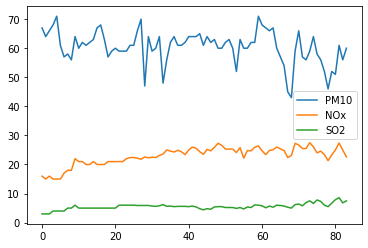

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,PM10,NOx,SO2
0,67.0,16.0,3.0
1,64.0,15.0,3.0
2,66.0,16.0,3.0
3,68.0,15.0,4.0
4,71.0,15.0,4.0
...,...,...,...
79,52.0,23.3,6.7
80,51.0,25.0,7.9
81,61.0,27.4,8.6
82,56.0,25.0,6.8


In [ ]:
n_future = 12
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
    trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])

In [ ]:
trainX, trainYP, trainYN, trainYS = np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))

trainX shape == (70, 3, 3).
trainYP shape == (70, 1).
trainYN shape == (70, 1).
trainYS shape == (70, 1).


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 8s 205ms/step - loss: 0.9380 - val_loss: 2.1046
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.9365 - val_loss: 2.1253
Epoch 3/200
4/4 [==============================] - 0s 40ms/step - loss: 0.9318 - val_loss: 2.1317
Epoch 4/200
4/4 [==============================] - 0s 37ms/step - loss: 0.9277 - val_loss: 2.1409
Epoch 5/200
4/4 [==============================] - 0s 43ms/step - loss: 0.9233 - val_loss: 2.1475
Epoch 6/200
4/4 [==============================] - 0s 17ms/step - loss: 0.9197 - val_loss: 2.1509
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 0.9113 - val_loss: 2.1568
Epoch 8/200
4/4 [==============================] - 0s 40ms/step - loss: 0.9088 - val_loss: 2.1659
Epoch 9/200
4/4 [==============================] - 0s 27ms/step - loss: 0.9054 - val_loss: 2.1744
Epoch 10/200
4/4 [==============================] - 0s 26ms/step - loss: 0.9078 - val_loss: 2.1861
Epoch 11/200
4/4 [

In [ ]:
historyP = history

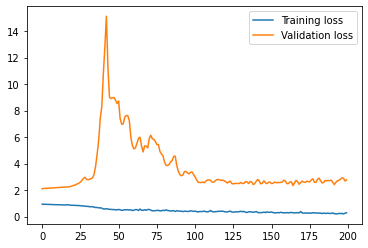

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predict_period_dates = pd.date_range(start = '01-01-2023',periods=12, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


In [ ]:
predictionP = modelP.predict(trainX[:12])

1/1 [==============================] - 0s 335ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecastP = pd.DataFrame({'Date':np.array(forecast_dates), 'PM10':y_pred_futureP})
df_forecastP['Date']=pd.to_datetime(df_forecastP['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='PM10'>

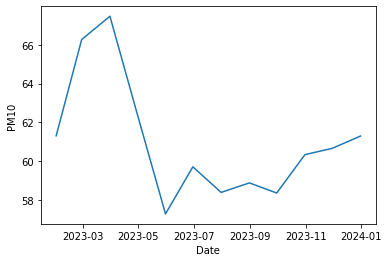

In [ ]:
sns.lineplot(df_forecastP['Date'], df_forecastP['PM10'])

In [ ]:
df_forecastP

,Date,PM10
0,2023-01-31,61.311935
1,2023-02-28,66.265106
2,2023-03-31,67.462502
3,2023-04-30,62.430313
4,2023-05-31,57.296219
5,2023-06-30,59.717724
6,2023-07-31,58.402088
7,2023-08-31,58.891434
8,2023-09-30,58.371284
9,2023-10-31,60.344769


In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 146ms/step - loss: 0.5070 - val_loss: 0.4496
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 0.4861 - val_loss: 0.4288
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4626 - val_loss: 0.4093
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4402 - val_loss: 0.3912
Epoch 5/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4208 - val_loss: 0.3738
Epoch 6/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3971 - val_loss: 0.3576
Epoch 7/200
4/4 [==============================] - 0s 17ms/step - loss: 0.3625 - val_loss: 0.3440
Epoch 8/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3333 - val_loss: 0.3351
Epoch 9/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2942 - val_loss: 0.3378
Epoch 10/200
4/4 [==============================] - 0s 18ms/step - loss: 0.2442 - val_loss: 0.3618
Epoch 11/200
4/4 [

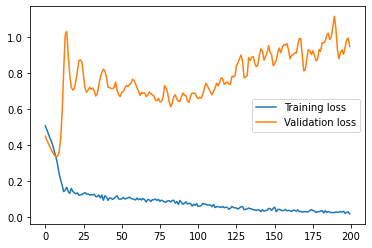

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX[:12])

1/1 [==============================] - 0s 292ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
df_forecastN = pd.DataFrame({'Date':np.array(forecast_dates), 'NOx':y_pred_futureN})
df_forecastN['Date']=pd.to_datetime(df_forecastN['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='NOx'>

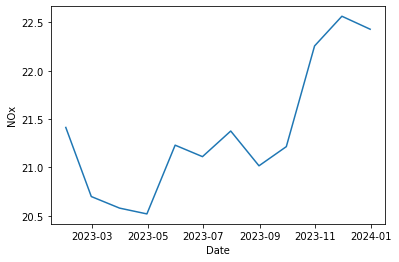

In [ ]:
sns.lineplot(df_forecastN['Date'], df_forecastN['NOx'])

In [ ]:
df_forecastN

,Date,NOx
0,2023-01-31,21.413239
1,2023-02-28,20.698219
2,2023-03-31,20.578508
3,2023-04-30,20.518461
4,2023-05-31,21.229906
5,2023-06-30,21.111204
6,2023-07-31,21.376245
7,2023-08-31,21.016382
8,2023-09-30,21.214781
9,2023-10-31,22.256718


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 136ms/step - loss: 0.4606 - val_loss: 3.3212
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4519 - val_loss: 3.3368
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.4500 - val_loss: 3.3503
Epoch 4/200
4/4 [==============================] - 0s 24ms/step - loss: 0.4474 - val_loss: 3.3688
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4439 - val_loss: 3.3875
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4434 - val_loss: 3.4092
Epoch 7/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4382 - val_loss: 3.4313
Epoch 8/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4317 - val_loss: 3.4623
Epoch 9/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4319 - val_loss: 3.4939
Epoch 10/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4242 - val_loss: 3.5378
Epoch 11/200
4/4 [

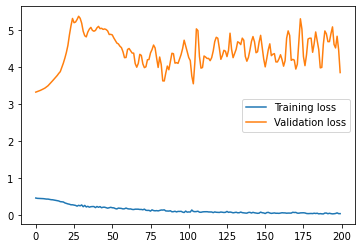

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX[:12])

1/1 [==============================] - 0s 298ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
df_forecastS = pd.DataFrame({'Date':np.array(forecast_dates), 'SO2':y_pred_futureS})
df_forecastS['Date']=pd.to_datetime(df_forecastS['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='SO2'>

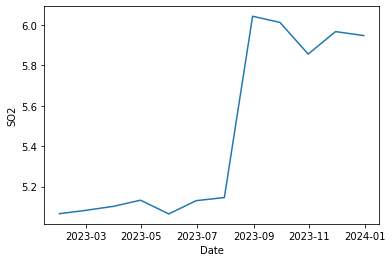

In [ ]:
sns.lineplot(df_forecastS['Date'], df_forecastS['SO2'])

In [ ]:
df_forecastS

,Date,SO2
0,2023-01-31,5.065878
1,2023-02-28,5.081964
2,2023-03-31,5.102062
3,2023-04-30,5.132698
4,2023-05-31,5.064790
5,2023-06-30,5.130374
6,2023-07-31,5.145871
7,2023-08-31,6.043543
8,2023-09-30,6.013041
9,2023-10-31,5.856221


In [ ]:
frames = [df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]]

In [ ]:
result = pd.concat([df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]], axis=1)

In [ ]:
result

,Date,PM10,NOx,SO2
0,2023-01-31,61.311935,21.413239,5.065878
1,2023-02-28,66.265106,20.698219,5.081964
2,2023-03-31,67.462502,20.578508,5.102062
3,2023-04-30,62.430313,20.518461,5.132698
4,2023-05-31,57.296219,21.229906,5.064790
5,2023-06-30,59.717724,21.111204,5.130374
6,2023-07-31,58.402088,21.376245,5.145871
7,2023-08-31,58.891434,21.016382,6.043543
8,2023-09-30,58.371284,21.214781,6.013041
9,2023-10-31,60.344769,22.256718,5.856221


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/LSTM Nizamabad AQI.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  result.to_csv(f)

Mounted at /content/drive
